# Autoencoders 
Autoencoders are a type of neural network for unsupervised learning tasks, particularly for dimensionality reduction, feature learning, and data denoising. They are designed to learn efficient codings of input data by training the network to compress the input into a latent-space representation and then reconstruct the output from this representation.

An autoencoder consists of two main parts:

1. **Encoder**: The encoder part of the network compresses the input data into a latent-space representation. It maps the input $ \mathbf{x} $ to a hidden representation $ \mathbf{z} $ using one or more layers. The transformation is typically defined as:
   $$
   \mathbf{z} = f(\mathbf{x})
   $$
   where $ f $ is a function representing the encoder, often involving several neural network layers.

2. **Decoder**: The decoder part of the network reconstructs the input data from the latent representation. It maps the hidden representation $ \mathbf{z} $ back to the input space, producing a reconstruction $ \mathbf{x'} $:
   $$
   \mathbf{x'} = g(\mathbf{z})
   $$
   where $ g $ is a function representing the decoder, again often involving several neural network layers.

The goal of training an autoencoder is to make the reconstructed input $ \mathbf{x'} $ as close as possible to the original input $ \mathbf{x}  $. This is typically achieved by minimizing a reconstruction loss function, such as mean squared error (MSE) or binary cross-entropy depending on the nature of the input data.

### Types of Autoencoders

1. **Basic Autoencoders**: These consist of a simple encoder-decoder pair, with the aim of learning a compressed representation of the input data.

2. **Denoising Autoencoders**: These are trained to remove noise from the input data. During training, the input data is corrupted with noise, and the autoencoder learns to reconstruct the original, noise-free data.

3. **Sparse Autoencoders**: These impose a sparsity constraint on the hidden units, encouraging the network to learn a more efficient and meaningful representation by activating only a small number of neurons in the latent space.

4. **Variational Autoencoders (VAEs)**: These are probabilistic models that learn the underlying distribution of the data. They consist of an encoder that maps the input to a distribution in the latent space and a decoder that samples from this distribution to reconstruct the input.

5. **Convolutional Autoencoders**: These use convolutional layers in the encoder and decoder, making them suitable for image data. They can capture spatial hierarchies in the data.

### Applications of Autoencoders

- **Dimensionality Reduction**: Reducing the number of features in the data while preserving important information.
- **Feature Extraction**: Learning useful features from the data for tasks such as classification and clustering.
- **Denoising**: Removing noise from corrupted data.
- **Image Compression**: Compressing image data while retaining important visual information.
- **Anomaly Detection**: Identifying anomalies in the data by detecting deviations from the learned normal patterns.


In this notebook we will build a simple auotencoder for Mnist data, and show how to use it for anomaly detection.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2024-05-17 06:02:20.409789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 06:02:20.409948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 06:02:20.555162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# How Autoencoder works
Both the encoder and the decoder are just composed by a couple of dense layers. The latent dimension is 16. This means that each input is reduced from an initial dimensions of 28*28=784 (Dimension of each image in MNIST) to a an internal dimension of just 16 floats.

Most of the relevant information is preserved, as testified by the fact that we are able to reconstruct, out of this 16 values, an image very similar to the original one.

### Structure of the Autoencoder

1. **Input Layer**: The input layer consists of 784 neurons (28x28 pixels flattened into a vector).

2. **Encoder**: The encoder compresses the input into a lower-dimensional representation. It might consist of a few dense (fully connected) layers that gradually reduce the dimensionality. For instance:
   - Dense layer 1: 784 neurons (input layer).
   - Dense layer 2: 128 neurons.
   - Dense layer 3: 64 neurons.
   - Dense layer 4: 32 neurons.
   - Dense layer 5: 16 neurons (latent space).

3. **Latent Space**: The latent space, also known as the `bottleneck`, is a layer with 16 neurons. This represents the compressed form of the input data. Despite the significant reduction in dimensions, this latent space captures the most relevant features of the input data.

4. **Decoder**: The decoder reconstructs the data from the latent space back to the original dimensions. It consists of several dense layers that progressively increase the dimensionality back to 784 neurons. For instance:
   - Dense layer 6: 32 neurons.
   - Dense layer 7: 64 neurons.
   - Dense layer 8: 128 neurons.
   - Dense layer 9: 784 neurons (output layer).

5. **Output Layer**: The output layer aims to reconstruct the original input image, also with 784 neurons reshaped back to 28x28 pixels.

### Why It Works

- **Dimensionality Reduction**: The encoder reduces the input data from 784 dimensions to 16 dimensions. This compression forces the network to learn the most important features of the data, effectively performing dimensionality reduction.

- **Feature Learning**: By training the autoencoder, the encoder learns a meaningful representation of the data in the latent space. These 16 values represent the core features necessary to reconstruct the original image.

- **Reconstruction**: Despite the drastic reduction in dimensions, the decoder can reconstruct an image similar to the original. This indicates that the autoencoder has successfully learned the important features and can recreate the input data from the compressed representation.

### Training Process

- **Loss Function**: The training involves minimizing a reconstruction loss, such as mean squared error (MSE), which measures the difference between the input image and the reconstructed image.
  
- **Optimization**: Through backpropagation and optimization techniques (e.g., stochastic gradient descent, Adam), the weights of the encoder and decoder are adjusted to minimize the reconstruction loss.

### Practical Implementation

Here is a simple implementation in Python using Keras:

```python
from keras.layers import Input, Dense
from keras.models import Model

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

# Decoder
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Assuming X_train contains the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
```

An autoencoder with dense layers compresses input data into a low-dimensional latent space and reconstructs it, effectively learning to capture the essential features of the input data. Despite the significant reduction in dimensions, the reconstruction's similarity to the original input demonstrates the autoencoder's ability to preserve relevant information.

In [2]:
# size of our encoded representations
mid_dim = 64
encoding_dim = 16 

# Input 
input_img = layers.Input(shape=(784, ))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(mid_dim, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(mid_dim, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,328 (403.62 KB)

 Trainable params: 103,328 (403.62 KB)

 Non-trainable params: 0 (0.00 B)

We can now compile the model and as loss function we can take mse or categorical crossentropy, as you prefer. 

In [4]:
adam = Adam(0.001)
autoencoder.compile(optimizer=adam, loss='mse')

We now load the datatet, and normalize it in the range [0,1]. We are not using labels.

In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


Time to fit the model. Observe that the ground truth we need to compare with is in this case the input itself. In other words, the loss is the distance between the inout $X$ and its reconstruction $\hat{X}$

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1025 - val_loss: 0.0423
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0386 - val_loss: 0.0298
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0287 - val_loss: 0.0244
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0243 - val_loss: 0.0221
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0222 - val_loss: 0.0209
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0212 - val_loss: 0.0202
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0205 - val_loss: 0.0196
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0200 - val_loss: 0.0193
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0197 - val_loss: 0.0190
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0193 - val_loss: 0.0186
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0190 - val_loss: 0.0184
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

Let us check the result. First of all we compute all reconstructions for images in the test set.

In [7]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Now we can plot the result. We pick ten random images, and for each of them we show the original and the reconstruction obtained from the autoencoder.

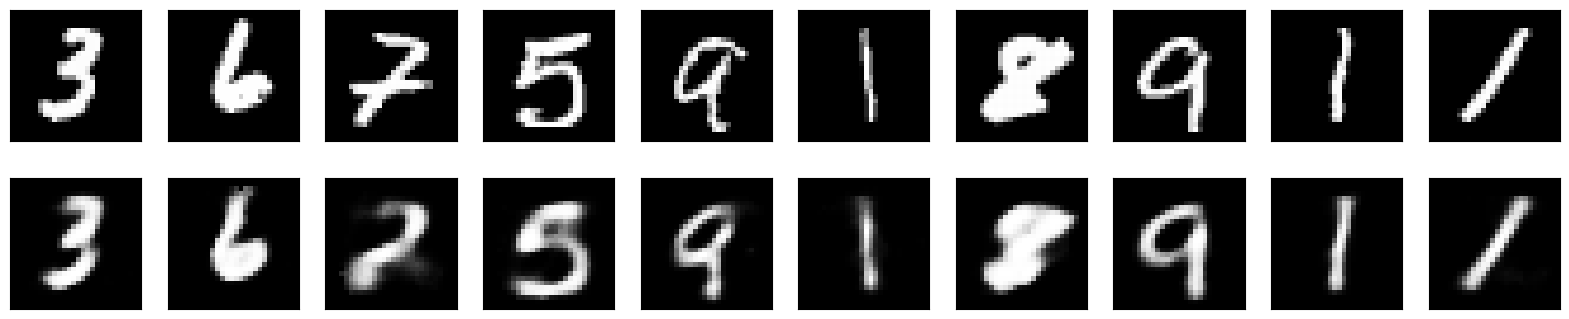

In [8]:
import matplotlib.pyplot as plt

n = 10 #no images to plot
imgs = np.random.randint(low=0,high=10000,size=n)
plt.figure(figsize=(20, 4))
for (i,idx) in enumerate(imgs):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Anomaly detection

Now, we want to show how we can use an autoencoder for anomaly detection.

The genral idea is that the encoding learned by the autoenoder is data-specific. This means that if we apply the autoencoder to an outlier, the resulting reconstruction should be sensibily worse than usual, and we may exploit this simple fact to detect the anomaly.

The first step of the procedure is to identify the `Canonical Expected Reconstruction Error` on true data, and the associated `Standard Deviation`.

- **Identifying Canonical Expected Reconstruction Error:**
The reconstruction error is calculated for each input image in the test set. This error indicates how well the autoencoder has been able to reconstruct the original image from its compressed representation.
The canonical expected reconstruction error is the average (mean) of these errors across all test images.

- **Calculating Standard Deviation:**
The standard deviation of the reconstruction errors provides insight into the variability of the reconstruction performance. A low standard deviation means that the autoencoder performs consistently across different inputs, while a high standard deviation indicates more variability in reconstruction quality.

In [9]:
mse_all = np.mean(np.square(decoded_imgs - x_test), axis=1) #mean error for each input
print(mse_all.shape) 

mse = np.mean(mse_all)
std = np.std(mse_all)
print("mse is {}, with a standard deviation of {}".format(mse, std))

(10000,)
mse is 0.01679156720638275, with a standard deviation of 0.009084324352443218


This tells us that on average, the reconstruction error (MSE) is about 0.018 with a standard deviation of 0.009. This information helps us identify what constitutes a "normal" reconstruction error.

### Creating an Anomaly
Now, we create an anomaly by rotating a normal image from the test set by 90 degrees. We will observe the reconstruction and compute the MSE for this modified image. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0263
0.026314973831176758


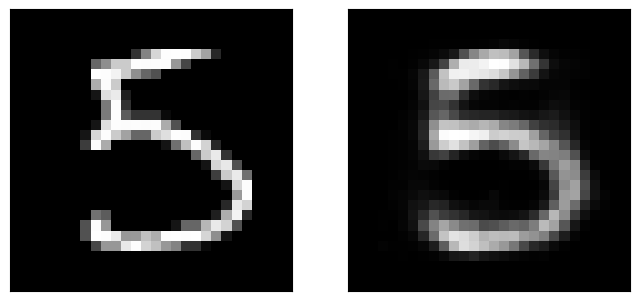

In [10]:
test = x_test[15].reshape(1,784)
print(autoencoder.evaluate(test,test))

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test[15].reshape(28, 28))

plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[15].reshape(28, 28))

plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('lyar1.jpg')
plt.show()

Observe that the reconstruction is not particularly good, but still the loss (0.032) is more or less on std away from the mean, that is a normal behaviour.


### Rotating the Image and Recomputing MSE
We then rotate the image by 90 degrees and compute the reconstruction error.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


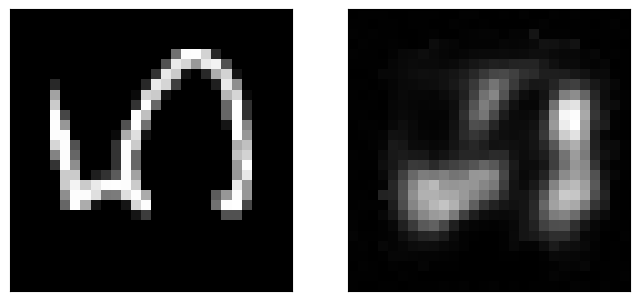

In [11]:
rotated = np.rot90(x_test[15].reshape(28,28))
predicted = autoencoder.predict(rotated.reshape(1,784))[0].reshape(28,28)

plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
plt.imshow(rotated)

plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax = plt.subplot(1, 2, 2)
plt.imshow(predicted)

plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('lyar2.jpg')
plt.show()

In [12]:
mse = np.mean(np.square(predicted-rotated))
print("mse is {}".format(mse))

mse is 0.05060863494873047


The MSE of the rotated image is 0.050, which is 3 standard deviations away from the mean reconstruction error (0.018). This indicates an anomaly because it significantly deviates from the normal reconstruction error distribution.

- __Using Latent Space for Anomaly Detection__ 
    - Instead of relying solely on reconstruction error, we could also work directly in the latent space. Autoencoders generalize Principal Component Analysis (PCA), extracting relevant, non-linear combinations of input features. Anomalies will significantly deviate from the canonical values of the latent encoding.
    - This approach involves examining the latent space representation (the output of the encoder) for anomalies, as significant deviations in the latent space can indicate anomalies even if the reconstruction error is not exceptionally high.